# MNIST en CNN : reconnaissance des chiffres de 0 à 9

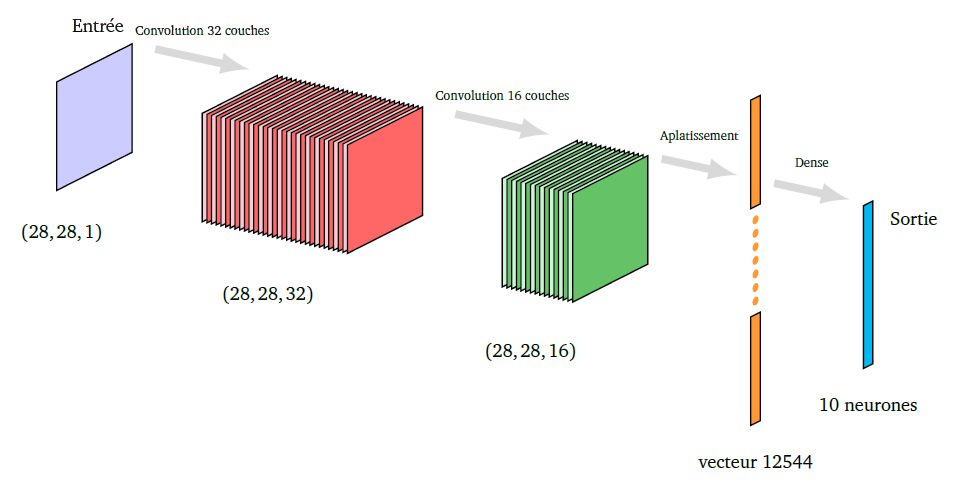

on résume l’architecture du réseau par des blocs, chaque bloc représentant une transformation

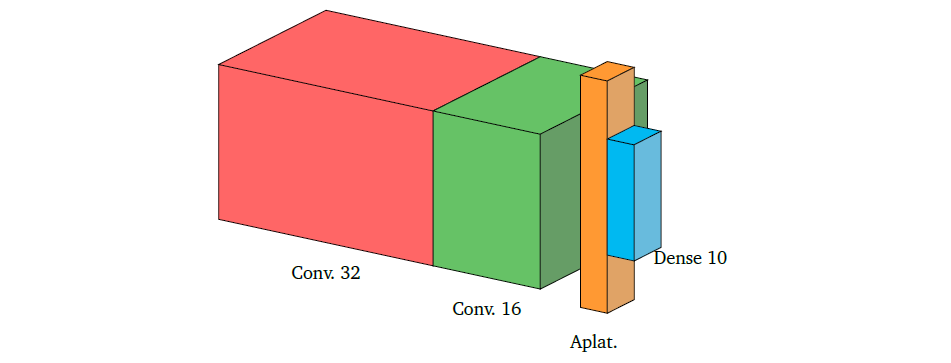

1. le modèle 

## 1. modules à charger

In [ ]:
#!/usr/bin/python3

import numpy as np
from tensorflow import keras
# from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

import matplotlib.pyplot as plt

## 2. Données

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train_data, Y_train_data), (X_test_data, Y_test_data) = mnist.load_data()

N = X_train_data.shape[0]  # 60 000 données

print(X_train_data[0].shape)
# print(X_train_data[0])


X_train = np.reshape(X_train_data, (N,28,28,1))
X_test = np.reshape(X_test_data, (X_test_data.shape[0],28,28,1))

# X_train = p.reshape(X_train_data,(N,784))  # vecteur image
# X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))

X_train = X_train/255  # normalisation
X_test = X_test/255

print(X_train[0].shape)
print(X_test[0].shape)

Y_train = to_categorical(Y_train_data, num_classes=10)
Y_test = to_categorical(Y_test_data, num_classes=10)

print(Y_train[0])
print(Y_train_data[0])

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
(28, 28, 1)
(28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


## 3. Réseau

In [ ]:
modele = Sequential()

# Première couche de convolution : 32 neurones, convolution 3x3, activation relu
modele.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))

# Deuxième couche de convolution : 16 neurones
modele.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))

# modele.add(Conv2D(8, kernel_size=3, activation='relu'))

# Aplatissage 
modele.add(Flatten())

# Couche de sortie : 1O neurone
modele.add(Dense(10, activation='softmax'))

# Descente de gradient
modele.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy'])

print(modele.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 130,394
Trainable params: 130,394
Non-trainable params: 0
_________________________________________________________________
None


## 4. Entrainement du modèle

In [ ]:
# Calcul des poids
modele.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1393 - accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0284 - accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - accuracy: 0.9933


## 5. Résultats

In [ ]:
### Partie C - Résultats

score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04236329346895218
Test accuracy: 0.9873999953269958


## 6. Visualisation

In [ ]:
def affiche_chiffre_train(i):
    plt.imshow(X_train_data[i], cmap='Greys')
    plt.title('Attendu %d' % Y_train_data[i])
    plt.show()

    return

## 7. un peu plus de résultats

313/313 [==============================] - 1s 2ms/step
Sortie réseau [1.2215068e-14 3.5433424e-14 8.0173500e-11 5.3380034e-09 4.1387389e-15
 5.7896990e-12 1.7615603e-23 1.0000000e+00 2.3301843e-11 6.0684755e-09]
Chiffre attendu : 7
Chiffre prédit : 7


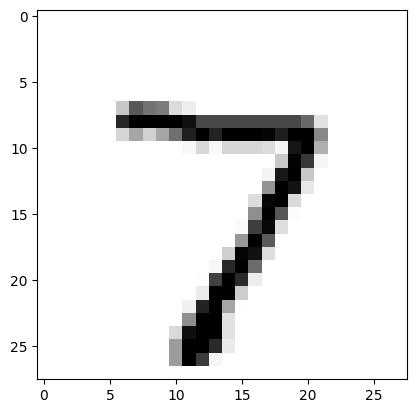

In [ ]:
# Prédiction sur les données de test
Y_predict = modele.predict(X_test)

# Un exemple
i = 0  # numéro de l'image 

chiffre_predit = np.argmax(Y_predict[i]) # prédiction par le réseau

print("Sortie réseau", Y_predict[i])
print("Chiffre attendu :", Y_test_data[i])
print("Chiffre prédit :", chiffre_predit)

plt.imshow(X_test_data[i], cmap='Greys')  
plt.show()

## 8. Visualisation

313/313 [==============================] - 1s 2ms/step

 --- Image numéro 0
Sortie réseau [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Chiffre attendu : 7


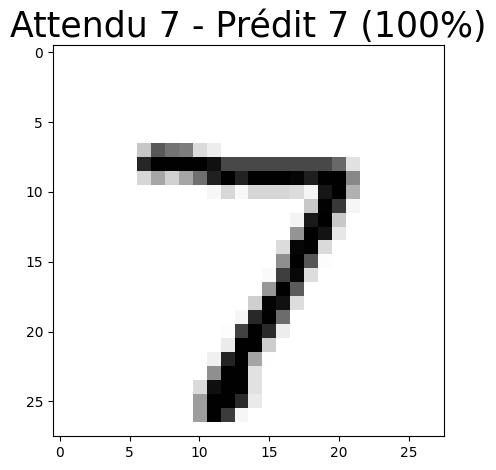


 --- Image numéro 1
Sortie réseau [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Chiffre attendu : 2


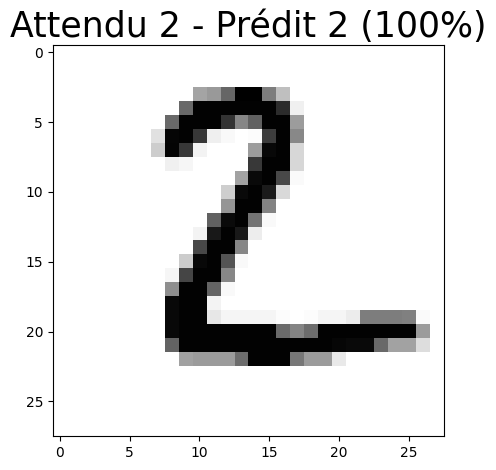


 --- Image numéro 2
Sortie réseau [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Chiffre attendu : 1


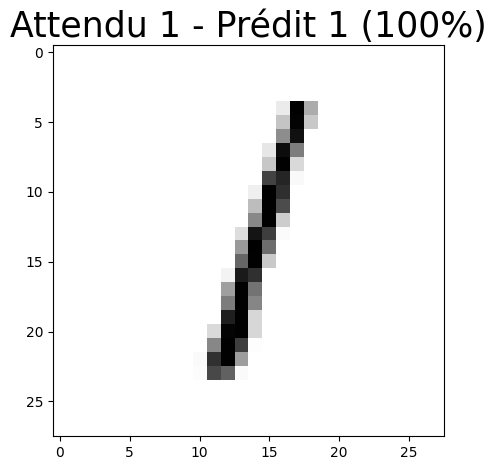


 --- Image numéro 3
Sortie réseau [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Chiffre attendu : 0


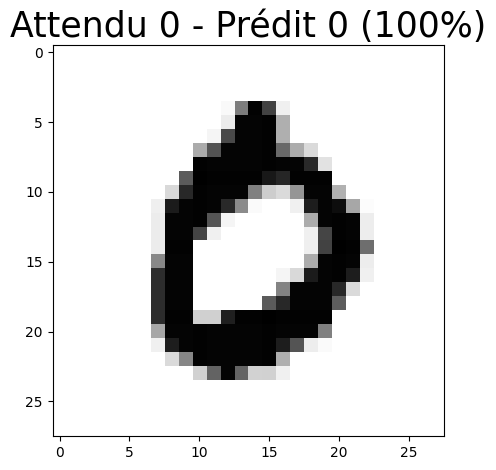


 --- Image numéro 4
Sortie réseau [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Chiffre attendu : 4


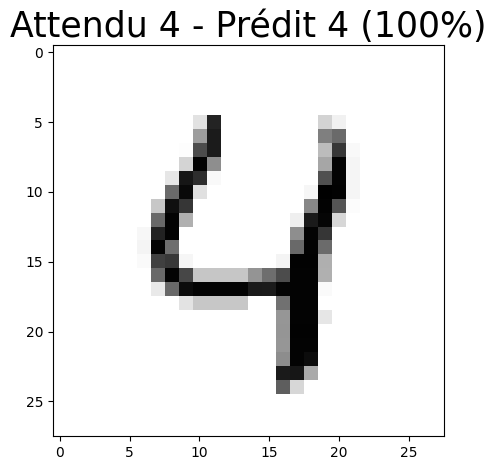


 --- Image numéro 5
Sortie réseau [0.    0.999 0.    0.    0.    0.    0.    0.001 0.    0.   ]
Chiffre attendu : 1


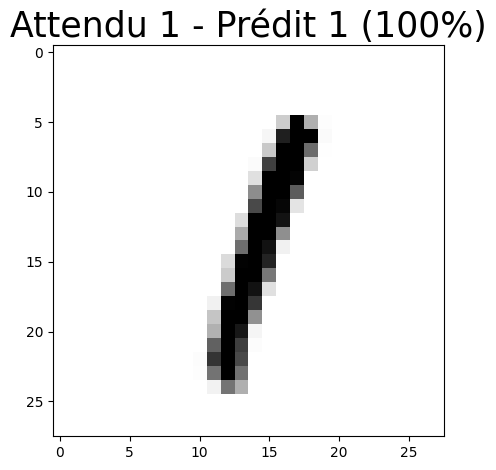


 --- Image numéro 6
Sortie réseau [0.    0.    0.    0.    0.998 0.    0.    0.    0.001 0.001]
Chiffre attendu : 4


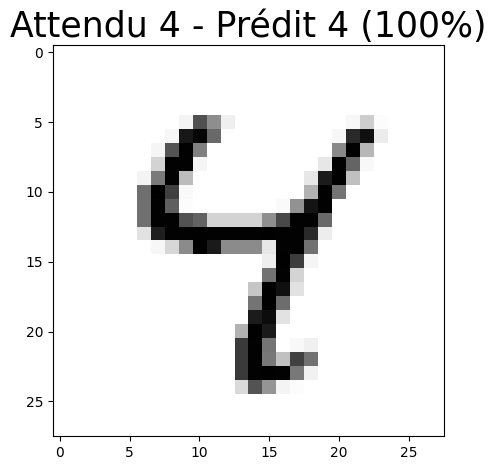


 --- Image numéro 7
Sortie réseau [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Chiffre attendu : 9


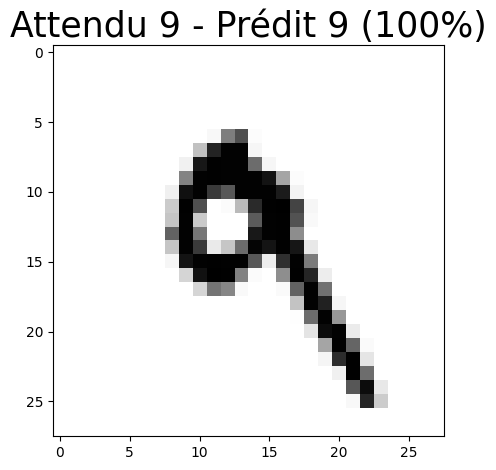


 --- Image numéro 8
Sortie réseau [0.    0.    0.    0.    0.    0.937 0.063 0.    0.    0.   ]
Chiffre attendu : 5


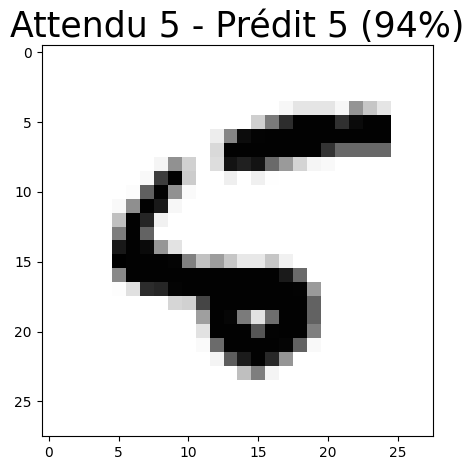


 --- Image numéro 9
Sortie réseau [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Chiffre attendu : 9


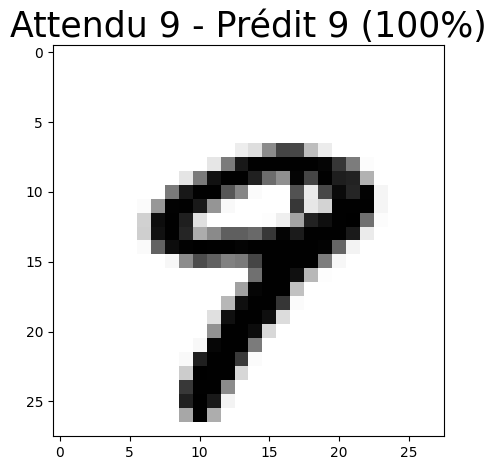

In [ ]:
# affiche_chiffre_train(0)

Y_predict = modele.predict(X_test)

# print(Y_predict[0])

def affiche_chiffre_test(i):
    plt.imshow(X_test_data[i], cmap='Greys')
    chiffre_predit = np.argmax(Y_predict[i])
    perc_max = round(100*np.max(Y_predict[i]))
    # '{:.1%}'.format(1/3.0)
    print("\n --- Image numéro", i)
    with np.printoptions(precision=3, suppress=True):
        print("Sortie réseau", Y_predict[i])
    print("Chiffre attendu :", Y_test_data[i])
    

    plt.title('Attendu %d - Prédit %d (%d%%)' % (Y_test_data[i], chiffre_predit, perc_max), fontsize=25)
    plt.tight_layout()
    plt.savefig('tfconv-chiffre-test-result-%d.png' %i)
    plt.show()

    return

for i in range(10):
    affiche_chiffre_test(i)


# F0 = [0.001, 0.000, 0.000, 0.008, 0.002, 0.005, 0.000, 0.965, 0.000, 0.020]

# F8 = [0.001, 0.000, 0.011, 0.000, 0.081, 0.009 0.881, 0.000, 0.013, 0.004]

# print(F0)
# print(F8)